In [2]:
import seml
import pandas as pd
from run_seml import run
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 120)

In [4]:
%load_ext autoreload
%autoreload 2

In [109]:
seml_results = seml.get_results('rgnn_rpprgo_papers100M', to_data_frame=True)

In [40]:
len(seml_results)

312

In [110]:
relevant_columns = ['_id', 
       'config.model_params.label',
       'config.model_params.model',
       'config.dataset', 
       'config.seed',
        'config.model_params.mean',
       'result.accuracy',
        'config.model_params.hidden_size',
        'config.model_params.nlayers',
       'config.model_params.n_filters',
       #'config.model_params.gdc_params', 
       #'config.model_params.svd_params',
       #'config.model_params.jaccard_params',
        'config.model_params.dropout', 
        'config.model_params.alpha',
        'config.model_params.eps',
        'config.model_params.topk', 
       'config.model_params.mean_kwargs.temperature',
       #'config.model_params.mean_kwargs.k',
       #'config.model_params.mean_kwargs.with_weight_correction',
       #'config.model_params.do_cache_adj_prep', 
       #'config.model_params.ppr_normalization',
       'config.train_params.lr',
       'config.train_params.weight_decay', 'config.train_params.patience',
       #'config.train_params.max_epochs', 'config.train_params.batch_mult_val',
       #'config.train_params.batch_size', 'config.binary_attr', 
       #'config.artifact_dir', 'config.model_storage_type', 'config.device',
       #'config.display_steps', 'config.data_device', 'config.data_dir',
       # 'result.trace_val', 'result.trace_train',
       #'result.model_path'
       ]
seml_results.columns

Index(['_id', 'config.overwrite', 'config.db_collection', 'config.dataset',
       'config.model_params.label', 'config.model_params.model',
       'config.model_params.dropout', 'config.model_params.n_filters',
       'config.model_params.gdc_params', 'config.model_params.svd_params',
       'config.model_params.jaccard_params',
       'config.model_params.do_cache_adj_prep', 'config.model_params.alpha',
       'config.model_params.eps', 'config.model_params.hidden_size',
       'config.model_params.mean',
       'config.model_params.mean_kwargs.temperature',
       'config.model_params.nlayers', 'config.model_params.ppr_normalization',
       'config.model_params.topk', 'config.train_params.lr',
       'config.train_params.weight_decay', 'config.train_params.patience',
       'config.train_params.max_epochs', 'config.train_params.batch_mult_val',
       'config.train_params.batch_size',
       'config.train_params.forward_batch_size', 'config.binary_attr',
       'config.seed', 'conf

In [112]:
seml_results[relevant_columns]#.sort_values("result.accuracy", ascending=False) 

,_id,config.model_params.label,config.model_params.model,config.dataset,config.seed,config.model_params.mean,result.accuracy,config.model_params.hidden_size,config.model_params.nlayers,config.model_params.n_filters,config.model_params.dropout,config.model_params.alpha,config.model_params.eps,config.model_params.topk,config.model_params.mean_kwargs.temperature,config.train_params.lr,config.train_params.weight_decay,config.train_params.patience
0,1,Soft Medoid PPRGo,RobustPPRGo,ogbn-papers100M,0,soft_median,0.428804,64,2,64,0.1,0.50,0.01,64,5.0,0.01,0.001,300
1,2,Soft Medoid PPRGo,RobustPPRGo,ogbn-papers100M,0,soft_median,0.353180,64,2,64,0.5,0.50,0.01,64,5.0,0.01,0.001,300
2,3,Soft Medoid PPRGo,RobustPPRGo,ogbn-papers100M,0,soft_median,0.433787,64,2,64,0.1,0.50,0.01,64,50.0,0.01,0.001,300
3,4,Soft Medoid PPRGo,RobustPPRGo,ogbn-papers100M,0,soft_median,0.358051,64,2,64,0.5,0.50,0.01,64,50.0,0.01,0.001,300
4,5,Soft Median PPRGo,RobustPPRGo,ogbn-papers100M,0,soft_median,0.382466,64,2,64,0.1,0.50,0.01,64,5.0,0.01,0.001,300
5,6,Soft Median PPRGo,RobustPPRGo,ogbn-papers100M,0,soft_median,0.313869,64,2,64,0.5,0.50,0.01,64,5.0,0.01,0.001,300
6,7,Soft Median PPRGo,RobustPPRGo,ogbn-papers100M,0,soft_median,0.378547,64,2,64,0.1,0.50,0.01,64,50.0,0.01,0.001,300
7,8,Soft Median PPRGo,RobustPPRGo,ogbn-papers100M,0,soft_median,0.315371,64,2,64,0.5,0.50,0.01,64,50.0,0.01,0.001,300
8,13,Soft Median PPRGo,RobustPPRGo,ogbn-papers100M,0,soft_median,0.381859,128,2,64,0.1,0.50,0.01,64,5.0,0.01,0.001,300
9,14,Soft Median PPRGo,RobustPPRGo,ogbn-papers100M,0,soft_median,0.332606,128,2,64,0.5,0.50,0.01,64,5.0,0.01,0.001,300


In [108]:
groups = [
"config.dataset",
'config.model_params.label',
#"config.model_params.model",
#'config.model_params.mean_kwargs.temperature',
#"config.model_params.n_filters",
#"config.binary_attr",
#"config.normalize",
#"config.model_params.ppr_normalization",
#"config.model_params.hidden_size",
#"config.model_params.nlayers",
#"config.model_params.alpha",
# "config.model_params.dropout",
#"config.model_params.mean"
]
# seml_results = seml_results[seml_results["config.binary_attr"]==False]
# seml_results = seml_results[seml_results["config.normalize"]==False]
# seml_results = seml_results[seml_results["config.normalize"]==False]
#seml_results = seml_results[seml_results['config.model_params.mean_kwargs.temperature']!=5.0]
seml_results[relevant_columns].groupby(groups).max()[["result.accuracy"]]

result.accuracy
config.dataset config.model_params.label                  
citeseer       Jaccard GCN                        0.736364
               RGCN                               0.704278
               SVD GCN                            0.654545
               Soft Median GDC (T=0.2)            0.719251
               Soft Median GDC (T=0.5)            0.714973
               Soft Median GDC (T=1.0)            0.713369
               Soft Medoid GDC (T=0.2)            0.704813
               Soft Medoid GDC (T=0.5)            0.719786
               Soft Medoid GDC (T=1.0)            0.717647
               Soft Medoid RPPRGo (T=0.2)         0.689305
               Soft Medoid RPPRGo (T=0.5)         0.708021
               Soft Medoid RPPRGo (T=1.0)         0.719786
               Vanilla GCN                        0.724064
               Vanilla GDC                        0.709091
               Vanilla PPRGo                      0.749198
cora_ml        Jaccard GCN                        0.821739
               RGCN                               0.822925
               SVD GCN                            0.781028
               Soft Median GDC (T=0.2)            0.820553
               Soft Median GDC (T=0.5)            0.833597
               Soft Median GDC (T=1.0)            0.839130
               Soft Medoid GDC (T=0.2)            0.799209
               Soft Medoid GDC (T=0.5)            0.817391
               Soft Medoid GDC (T=1.0)            0.830040
               Soft Medoid RPPRGo (T=0.2)         0.696443
               Soft Medoid RPPRGo (T=0.5)         0.710277
               Soft Medoid RPPRGo (T=1.0)         0.734783
               Vanilla GCN                        0.831225
               Vanilla GDC                        0.833992
               Vanilla PPRGo                      0.797628

In [52]:
#sum(list(seml_results["config.dataset"] == "citeseer")  and list(seml_results["config.model_params.mean"] == "soft_k_medoid"))

1200

In [94]:
cora_results = seml_results[list(seml_results["config.dataset"] == "cora_ml")]
citeseer_results = seml_results[list(seml_results["config.dataset"] == "citeseer")]

In [95]:

cora_median_results = cora_results[cora_results["config.model_params.mean"] == "soft_median"]
cora_mediod_results = cora_results[cora_results["config.model_params.mean"] == "soft_k_medoid"]

citeseer_median_results = citeseer_results[citeseer_results["config.model_params.mean"] == "soft_median"]
citeseer_mediod_results = citeseer_results[citeseer_results["config.model_params.mean"] == "soft_k_medoid"]

len(cora_median_results),len(cora_mediod_results),len(citeseer_median_results),len(citeseer_mediod_results)                    

In [85]:
cora_median_results[cora_median_results[metric] == cora_median_results[metric].max()][relevant_columns]

,_id,config.model_params.label,config.model_params.model,config.dataset,config.seed,result.accuracy,config.model_params.hidden_size,config.model_params.nlayers,config.model_params.dropout,config.model_params.alpha,config.model_params.topk,config.model_params.mean_kwargs.temperature,config.train_params.lr,config.train_params.weight_decay,config.train_params.patience
3243,3244,Soft Median PPRGo,RobustPPRGo,cora_ml,5,0.747036,64,2,0.25,0.1,64,1.0,0.01,0.001,300
3278,3279,Soft Median PPRGo,RobustPPRGo,cora_ml,5,0.747036,64,2,0.25,0.1,64,1.0,0.01,0.001,300


In [91]:
citeseer_mediod_results = citeseer_mediod_results[citeseer_mediod_results['config.model_params.mean_kwargs.temperature']==0.2]
citeseer_mediod_results[citeseer_mediod_results[metric] == citeseer_mediod_results[metric].max()][relevant_columns]

,_id,config.model_params.label,config.model_params.model,config.dataset,config.seed,result.accuracy,config.model_params.hidden_size,config.model_params.nlayers,config.model_params.dropout,config.model_params.alpha,config.model_params.topk,config.model_params.mean_kwargs.temperature,config.train_params.lr,config.train_params.weight_decay,config.train_params.patience
2807,2808,Soft Medoid PPRGo,RobustPPRGo,citeseer,1,0.704278,64,2,0.5,0.1,64,0.2,0.01,0.001,300
2824,2825,Soft Medoid PPRGo,RobustPPRGo,citeseer,1,0.704278,64,2,0.5,0.1,64,0.2,0.01,0.001,300
2889,2890,Soft Medoid PPRGo,RobustPPRGo,citeseer,1,0.704278,64,2,0.5,0.1,64,0.2,0.01,0.001,300


In [98]:
metric = "result.accuracy"
best_results = cora_results[cora_results[metric] == cora_results[metric].max()]

best_results = pd.concat([
    best_results,
    citeseer_results[citeseer_results[metric] == citeseer_results[metric].max()]])
    
best_results[relevant_columns]

,_id,config.model_params.label,config.model_params.model,config.dataset,config.seed,result.accuracy,config.model_params.hidden_size,config.model_params.nlayers,config.model_params.dropout,config.model_params.alpha,config.model_params.topk,config.train_params.lr,config.train_params.weight_decay,config.train_params.patience
1791,1792,Vanilla PPRGo,PPRGo,cora_ml,5,0.805534,64,2,0.1,0.1,64,0.01,0.001,300
1903,1904,Vanilla PPRGo,PPRGo,citeseer,1,0.749198,64,2,0.1,0.1,64,0.01,0.001,300
1991,1992,Vanilla PPRGo,PPRGo,citeseer,1,0.749198,64,2,0.1,0.1,64,0.01,0.001,300
2203,2204,Vanilla PPRGo,PPRGo,citeseer,1,0.749198,64,2,0.1,0.1,64,0.01,0.001,300


In [81]:
metric = "result.accuracy"
best_results = cora_median_results[cora_median_results[metric] == cora_median_results[metric].max()]

best_results = pd.concat([
    best_results,
    cora_mediod_results[cora_mediod_results[metric] == cora_mediod_results[metric].max()]])
    
best_results = pd.concat([
    best_results,
    citeseer_median_results[citeseer_median_results[metric] == citeseer_median_results[metric].max()]])

best_results = pd.concat([
    best_results,
    citeseer_mediod_results[citeseer_mediod_results[metric] == citeseer_mediod_results[metric].max()]])

best_results[relevant_columns]

,_id,config.model_params.label,config.model_params.model,config.dataset,config.seed,result.accuracy,config.model_params.hidden_size,config.model_params.nlayers,config.model_params.dropout,config.model_params.alpha,config.model_params.topk,config.model_params.mean_kwargs.temperature,config.train_params.lr,config.train_params.weight_decay,config.train_params.patience
3243,3244,Soft Median PPRGo,RobustPPRGo,cora_ml,5,0.747036,64,2,0.25,0.1,64,1.0,0.01,0.001,300
3278,3279,Soft Median PPRGo,RobustPPRGo,cora_ml,5,0.747036,64,2,0.25,0.1,64,1.0,0.01,0.001,300
2696,2697,Soft Medoid PPRGo,RobustPPRGo,cora_ml,5,0.763636,64,2,0.10,0.1,64,1.0,0.01,0.001,300
3407,3408,Soft Median PPRGo,RobustPPRGo,citeseer,1,0.731016,64,2,0.50,0.1,64,1.0,0.01,0.001,300
2822,2823,Soft Medoid PPRGo,RobustPPRGo,citeseer,1,0.727807,160,2,0.25,0.1,64,1.0,0.01,0.001,300
2828,2829,Soft Medoid PPRGo,RobustPPRGo,citeseer,1,0.727807,160,2,0.25,0.1,64,1.0,0.01,0.001,300
2874,2875,Soft Medoid PPRGo,RobustPPRGo,citeseer,1,0.727807,160,2,0.25,0.1,64,1.0,0.01,0.001,300


In [104]:
print(best_results[relevant_columns].to_markdown())

|      |   _id | config.model_params.model   | config.dataset   |   result.accuracy |   config.model_params.hidden_size |   config.model_params.nlayers |   config.model_params.dropout |   config.model_params.alpha |   config.model_params.eps |   config.model_params.topk | config.model_params.ppr_normalization   |
|-----:|------:|:----------------------------|:-----------------|------------------:|----------------------------------:|------------------------------:|------------------------------:|----------------------------:|--------------------------:|---------------------------:|:----------------------------------------|
| 1791 |  1792 | PPRGo                       | cora_ml          |          0.805534 |                                64 |                             2 |                           0.1 |                         0.1 |                      0.01 |                         64 | row                                     |
| 1903 |  1904 | PPRGo                       | citeseer

In [10]:
def epoch_mean(trace, epoch_num):
    epoch_mean = list()
    batches_per_epoch = int(len(trace) / epoch_num)
    for i in range(epoch_num):
        epoch_mean.append(sum(trace[i * batches_per_epoch:(i+1) * batches_per_epoch]) / batches_per_epoch)
    return epoch_mean

In [119]:
ids = [12, 14, 16, 17] #list(range(12, 18))#[2,0,10,4,8]
ids

[12, 14, 16, 17]

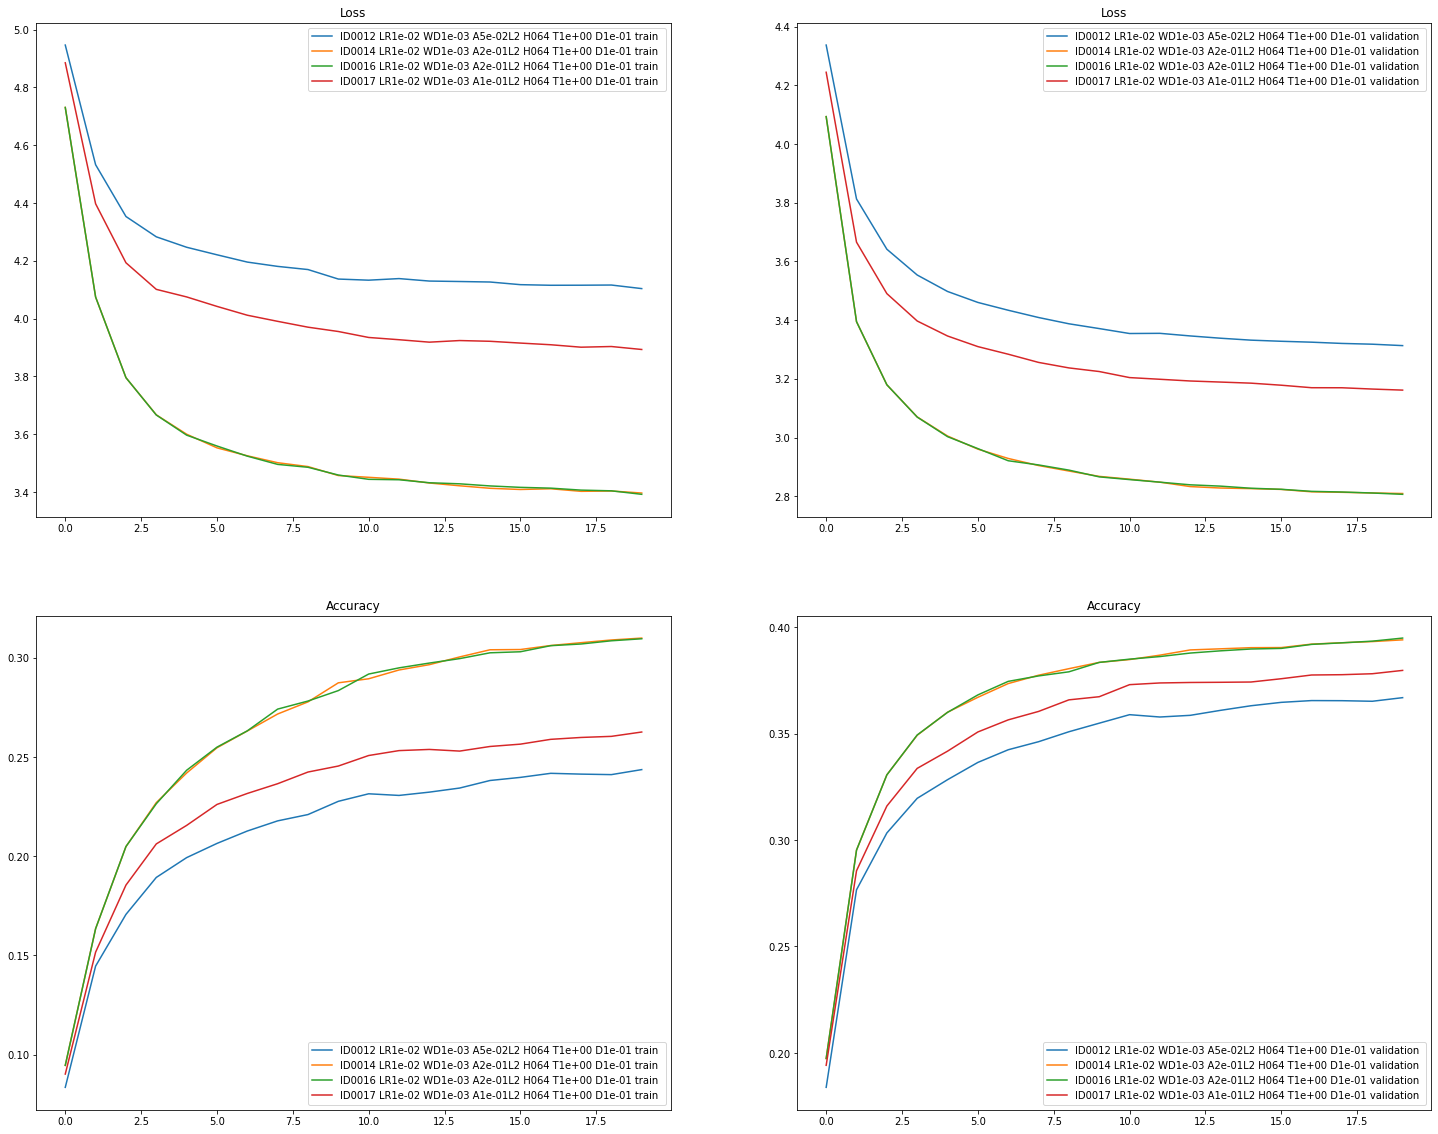

In [120]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2,2, figsize=(25, 20))
max_epoch_plot = 30
for i in ids:
    exp = seml_results.iloc[i]
    exp_id = exp["_id"]
    lr = exp["config.train_params.lr"]
    weight_decay = exp["config.train_params.weight_decay"]
    alpha = exp["config.model_params.alpha"]
    nlayers = exp["config.model_params.nlayers"]
    hidden_size = exp["config.model_params.hidden_size"]
    temperature = exp["config.model_params.mean_kwargs.temperature"]
    dropout = exp["config.model_params.dropout"]
    name_suffix = f"ID{i:04d} LR{lr:.0e} WD{weight_decay:.0e} A{alpha:.0e} L{nlayers} H{hidden_size:03d} T{temperature:.0e} D{dropout:.0e}"

    epoch_num = exp["config.train_params.max_epochs"]
    val_loss = epoch_mean(exp["result.trace_val.loss"], epoch_num)
    val_acc = epoch_mean(exp["result.trace_val.acc"], epoch_num)
    train_loss = epoch_mean(exp["result.trace_train.loss"], epoch_num)
    train_acc = epoch_mean(exp["result.trace_train.acc"], epoch_num)

    axs[0, 0].plot(train_loss[:max_epoch_plot], label= f"{name_suffix} train ")
    axs[0, 1].plot(val_loss[:max_epoch_plot], label= f"{name_suffix} validation ")
    axs[1, 0].plot(train_acc[:max_epoch_plot], label= f"{name_suffix} train ")
    axs[1, 1].plot(val_acc[:max_epoch_plot], label= f"{name_suffix} validation ")

axs[0, 0].set_title("Loss")
axs[0, 0].legend(loc="best")
axs[0, 1].set_title("Loss")
axs[0, 1].legend(loc="best")
axs[1, 0].set_title("Accuracy")
axs[1, 0].legend(loc="best")
axs[1, 1].set_title("Accuracy")
axs[1, 1].legend(loc="best")
plt.show()

In [14]:
exp
# _id config.model_params.nlayers  config.model_params.hidden_size config.model_params.mean_kwargs.temperature config.model_params.dropout

_id                                                                                           15
config.overwrite                                                                              15
config.db_collection                                                      rgnn_rpprgo_papers100M
config.dataset                                                                   ogbn-papers100M
config.model_params.label                                                      Soft Median PPRGo
config.model_params.model                                                            RobustPPRGo
config.model_params.dropout                                                                  0.1
config.model_params.n_filters                                                                 64
config.model_params.gdc_params                                                              None
config.model_params.svd_params                                                              None
config.model_params.jaccard_pa